In [7]:
# GAN
# 출처 : https://github.com/golbin/TensorFlow-Tutorials/blob/master/09%20-%20GAN/01%20-%20GAN.py

# tensorflow 및 GAN을 돌리는데 필요한 library를 import
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# mnist data를 import해서 mnist라는 변수에 저장
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [8]:
# hyper parameter 선언
total_epoch = 100 # 전체 학습하는 과정을 100번 돌림
batch_size = 100 # data를 가져올때마다 image 100개씩 가져와서 처리함
learning_rate = 0.0002 # learning rate 설정

# 신경망 레이어 구성 옵션
n_hidden = 256 # hidden layer 차원 크기 설정
n_input = 28 * 28 # image size
n_noise = 128  # 생성기의 입력값으로 사용할 노이즈의 크기

In [9]:
# 신경망 모델 구성

X = tf.placeholder(tf.float32, [None, n_input]) # 입력으로 들어갈 이미지가 이 변수에 담기게 될 예정
Z = tf.placeholder(tf.float32, [None, n_noise]) # 노이즈 Z를 입력값으로 사용

# 생성기(Generator) 신경망에 사용하는 변수
G_W1 = tf.Variable(tf.random_normal([n_noise, n_hidden], stddev=0.01)) # 랜덤한 숫자로 weight를 초기화
G_b1 = tf.Variable(tf.zeros([n_hidden])) # 0으로 초기화
G_W2 = tf.Variable(tf.random_normal([n_hidden, n_input], stddev=0.01))
G_b2 = tf.Variable(tf.zeros([n_input]))

# 판별기(Discriminator) 신경망에 사용하는 변수
D_W1 = tf.Variable(tf.random_normal([n_input, n_hidden], stddev=0.01))
D_b1 = tf.Variable(tf.zeros([n_hidden]))

# 판별기의 최종 결과값은 얼마나 진짜와 가깝냐를 판단하는 한 개의 스칼라값
D_W2 = tf.Variable(tf.random_normal([n_hidden, 1], stddev=0.01))
D_b2 = tf.Variable(tf.zeros([1])) # 한개의 스칼라 값 = 숫자 하나를 0으로 초기화

In [10]:
# 생성기(Generator)의 신경망을 구성
def generator(noise_z):
    hidden = tf.nn.relu(tf.matmul(noise_z, G_W1) + G_b1) # hidden layer는 relu 사용. noise_z가 input으로 들어간다.
    output = tf.nn.sigmoid(tf.matmul(hidden, G_W2) + G_b2) # output은 sigmoid를 사용하여 0과 1사이 값으로 output이 나오도록 한다.
    return output

In [11]:
# 판별기(Discriminator)의 신경망을 구성
def discriminator(inputs):
    hidden = tf.nn.relu(tf.matmul(inputs, D_W1) + D_b1) # inputs(이미지)가 input으로 들어감
    output = tf.nn.sigmoid(tf.matmul(hidden, D_W2) + D_b2) # 마찬가지로 sigmoid를 사용하여 0과 1사이 값으로 나오고 참/거짓으로 분류
    return output


In [12]:
# 랜덤한 노이즈(Z) 생성
def get_noise(batch_size, n_noise):
    return np.random.normal(size=(batch_size, n_noise))

In [13]:
# 노이즈를 이용해 랜덤한 이미지를 생성
G = generator(Z)
# 노이즈를 이용해 생성한 이미지가 진짜 이미지인지 판별한 값을 구함
D_gene = discriminator(G)
# 진짜 이미지를 이용해 판별한 값을 구함
D_real = discriminator(X)

In [14]:
# Discriminator의 loss 함수
# 판별기(D)에 진짜 이미지 tf.log(D_real)를 넣었을 때도 가짜 이미지 tf.log(1 - D_gene)를 넣었을 때도 최대값을 갖도록 학습한다
loss_D = tf.reduce_mean(tf.log(D_real) + tf.log(1 - D_gene))

![](img/g.PNG)

In [15]:
# Generator의 loss 함수
# 생성기(G)는 가짜 이미지를 넣었을 때 D가 실제 이미지라고 판단하도록 D_gene 값을 최대화 하도록 학습한다
loss_G = tf.reduce_mean(tf.log(D_gene))

![](img/d.PNG)

In [16]:
# loss_D 를 구할 때는 판별기 신경망에 사용되는 변수만 사용하고,
# loss_G 를 구할 때는 생성기 신경망에 사용되는 변수만 사용하여 최적화
D_var_list = [D_W1, D_b1, D_W2, D_b2]
G_var_list = [G_W1, G_b1, G_W2, G_b2]

In [17]:
# GAN 논문의 수식에 따르면 loss 를 극대화 해야하지만, minimize 하는 최적화 함수를 사용하기 때문에
# 최적화 하려는 loss_D 와 loss_G 에 음수 부호를 붙여줌
train_D = tf.train.AdamOptimizer(learning_rate).minimize(-loss_D,var_list=D_var_list)
train_G = tf.train.AdamOptimizer(learning_rate).minimize(-loss_G,var_list=G_var_list)

Epoch: 0000 D loss: -0.4992 G loss: -2.028


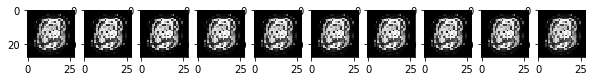

Epoch: 0001 D loss: -0.4373 G loss: -2.277
Epoch: 0002 D loss: -0.3356 G loss: -2.311
Epoch: 0003 D loss: -0.4799 G loss: -1.639
Epoch: 0004 D loss: -0.1914 G loss: -2.526
Epoch: 0005 D loss: -0.4972 G loss: -2.064
Epoch: 0006 D loss: -0.1891 G loss: -2.794
Epoch: 0007 D loss: -0.256 G loss: -2.75
Epoch: 0008 D loss: -0.2711 G loss: -2.757
Epoch: 0009 D loss: -0.2997 G loss: -2.698


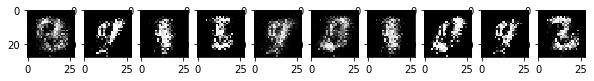

Epoch: 0010 D loss: -0.319 G loss: -2.726
Epoch: 0011 D loss: -0.339 G loss: -2.784
Epoch: 0012 D loss: -0.3548 G loss: -2.562
Epoch: 0013 D loss: -0.3476 G loss: -2.57
Epoch: 0014 D loss: -0.3688 G loss: -2.444
Epoch: 0015 D loss: -0.3083 G loss: -2.665
Epoch: 0016 D loss: -0.536 G loss: -2.164
Epoch: 0017 D loss: -0.4403 G loss: -2.224
Epoch: 0018 D loss: -0.5061 G loss: -2.27
Epoch: 0019 D loss: -0.5048 G loss: -2.237


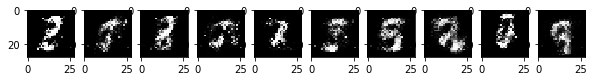

Epoch: 0020 D loss: -0.402 G loss: -2.65
Epoch: 0021 D loss: -0.607 G loss: -2.039
Epoch: 0022 D loss: -0.5696 G loss: -2.21
Epoch: 0023 D loss: -0.3662 G loss: -2.592
Epoch: 0024 D loss: -0.4236 G loss: -2.713
Epoch: 0025 D loss: -0.4949 G loss: -2.111
Epoch: 0026 D loss: -0.607 G loss: -2.279
Epoch: 0027 D loss: -0.4728 G loss: -2.519
Epoch: 0028 D loss: -0.4287 G loss: -2.418
Epoch: 0029 D loss: -0.5746 G loss: -2.142


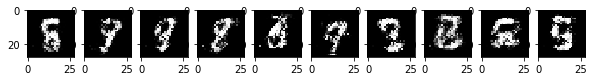

Epoch: 0030 D loss: -0.5038 G loss: -2.365
Epoch: 0031 D loss: -0.4229 G loss: -2.697
Epoch: 0032 D loss: -0.4048 G loss: -2.816
Epoch: 0033 D loss: -0.3629 G loss: -2.539
Epoch: 0034 D loss: -0.566 G loss: -2.455
Epoch: 0035 D loss: -0.6382 G loss: -2.194
Epoch: 0036 D loss: -0.6826 G loss: -1.987
Epoch: 0037 D loss: -0.4747 G loss: -2.357
Epoch: 0038 D loss: -0.5988 G loss: -1.951
Epoch: 0039 D loss: -0.7369 G loss: -1.946


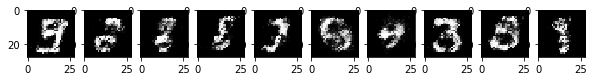

Epoch: 0040 D loss: -0.6785 G loss: -2.146
Epoch: 0041 D loss: -0.6575 G loss: -2.24
Epoch: 0042 D loss: -0.8136 G loss: -2.187
Epoch: 0043 D loss: -0.8371 G loss: -1.847
Epoch: 0044 D loss: -0.8649 G loss: -1.894
Epoch: 0045 D loss: -0.8144 G loss: -2.183
Epoch: 0046 D loss: -0.8773 G loss: -1.987
Epoch: 0047 D loss: -0.7721 G loss: -2.023
Epoch: 0048 D loss: -0.7175 G loss: -1.879
Epoch: 0049 D loss: -0.6731 G loss: -1.956


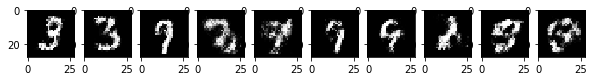

Epoch: 0050 D loss: -0.9258 G loss: -1.841
Epoch: 0051 D loss: -0.7611 G loss: -2.012
Epoch: 0052 D loss: -0.7028 G loss: -1.971
Epoch: 0053 D loss: -0.7279 G loss: -1.912
Epoch: 0054 D loss: -0.901 G loss: -1.802
Epoch: 0055 D loss: -0.7422 G loss: -1.959
Epoch: 0056 D loss: -0.8381 G loss: -1.788
Epoch: 0057 D loss: -0.6857 G loss: -1.608
Epoch: 0058 D loss: -0.7815 G loss: -1.714
Epoch: 0059 D loss: -0.7873 G loss: -1.671


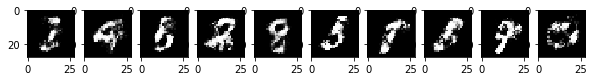

Epoch: 0060 D loss: -0.8687 G loss: -1.631
Epoch: 0061 D loss: -0.8132 G loss: -1.85
Epoch: 0062 D loss: -0.9135 G loss: -1.822
Epoch: 0063 D loss: -0.8227 G loss: -1.777
Epoch: 0064 D loss: -0.8534 G loss: -1.659
Epoch: 0065 D loss: -0.8167 G loss: -1.771
Epoch: 0066 D loss: -0.7681 G loss: -1.657
Epoch: 0067 D loss: -0.9223 G loss: -1.557
Epoch: 0068 D loss: -0.7071 G loss: -2.013
Epoch: 0069 D loss: -0.7411 G loss: -1.644


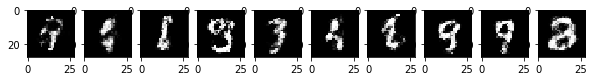

Epoch: 0070 D loss: -0.7733 G loss: -1.792
Epoch: 0071 D loss: -0.8458 G loss: -1.603
Epoch: 0072 D loss: -0.8756 G loss: -1.775
Epoch: 0073 D loss: -0.8288 G loss: -1.743
Epoch: 0074 D loss: -0.7801 G loss: -1.653
Epoch: 0075 D loss: -0.8064 G loss: -1.706
Epoch: 0076 D loss: -0.8319 G loss: -1.715
Epoch: 0077 D loss: -0.7746 G loss: -1.655
Epoch: 0078 D loss: -0.7467 G loss: -1.784
Epoch: 0079 D loss: -0.9168 G loss: -1.633


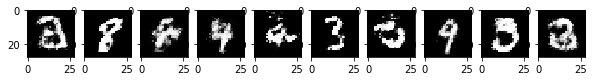

Epoch: 0080 D loss: -0.8405 G loss: -1.584
Epoch: 0081 D loss: -0.7622 G loss: -1.776
Epoch: 0082 D loss: -0.7364 G loss: -1.695
Epoch: 0083 D loss: -0.8733 G loss: -1.786
Epoch: 0084 D loss: -0.6844 G loss: -1.806
Epoch: 0085 D loss: -0.6256 G loss: -1.757
Epoch: 0086 D loss: -0.8798 G loss: -1.811
Epoch: 0087 D loss: -0.8432 G loss: -1.556
Epoch: 0088 D loss: -0.6873 G loss: -1.854
Epoch: 0089 D loss: -0.8608 G loss: -1.765


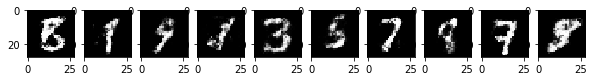

Epoch: 0090 D loss: -0.7599 G loss: -1.617
Epoch: 0091 D loss: -0.8187 G loss: -2.063
Epoch: 0092 D loss: -0.923 G loss: -1.787
Epoch: 0093 D loss: -0.8055 G loss: -1.707
Epoch: 0094 D loss: -0.7692 G loss: -1.784
Epoch: 0095 D loss: -0.7223 G loss: -1.81
Epoch: 0096 D loss: -0.8042 G loss: -1.808
Epoch: 0097 D loss: -0.7819 G loss: -1.825
Epoch: 0098 D loss: -0.7528 G loss: -1.631
Epoch: 0099 D loss: -0.7971 G loss: -1.701


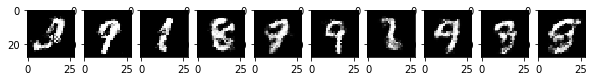

최적화 완료!


In [25]:
# 신경망 모델 학습

sess = tf.Session() # 세션 생성
sess.run(tf.global_variables_initializer()) # 변수 초기화

total_batch = int(mnist.train.num_examples/batch_size) # 전체 이미지 갯수/batch_size 해서 한번 학습 할때 100batch_size로 몇번을 해야 1epoch을 도는지 계산
loss_val_D, loss_val_G = 0, 0 # 변수 0으로 초기화

for epoch in range(total_epoch):
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        noise = get_noise(batch_size, n_noise)

        # 판별기와 생성기 신경망을 각각 학습
        _, loss_val_D = sess.run([train_D, loss_D], feed_dict={X: batch_xs, Z: noise})
        _, loss_val_G = sess.run([train_G, loss_G], feed_dict={Z: noise})

    print('Epoch:', '%04d' % epoch,
          'D loss: {:.4}'.format(loss_val_D),
          'G loss: {:.4}'.format(loss_val_G))
    
    
    # 학습이 되어가는 모습을 보기 위해 주기적으로 이미지를 보여줌
    if epoch == 0 or (epoch + 1) % 10 == 0:
        sample_size = 10
        noise = get_noise(sample_size, n_noise)
        samples = sess.run(G, feed_dict={Z: noise})
        
        fig, ax = plt.subplots(1, sample_size, figsize=(sample_size, 1))

        for i in range(sample_size):
            ax[i].imshow(np.reshape(samples[i], (28, 28)), 'gray')
        
        plt.show()

print('최적화 완료!')